# Data Exploration - Post-Preparation

In this section, we'll be conducting analysis on the dataset post-preparation.

### Import Libraries

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr
%matplotlib inline

### Read data

In [7]:
df = pd.read_csv('../../../datasets/parte1/dataset_cleaned.csv')

### Data overview

In [8]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2,13.4,22.9,0.6,4.8,7.611178,13,44.0,13,14,...,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,12
1,2,7.4,25.1,0.0,4.8,7.611178,14,44.0,6,15,...,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,12
2,2,12.9,25.7,0.0,4.8,7.611178,15,46.0,13,15,...,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,12
3,2,9.2,28.0,0.0,4.8,7.611178,4,24.0,9,0,...,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,12
4,2,17.5,32.3,1.0,4.8,7.611178,13,41.0,1,7,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140782,41,3.5,21.8,0.0,4.8,7.611178,0,31.0,2,0,...,27.0,1024.7,1021.2,4.447461,4.50993,9.4,20.9,0,0,6
140783,41,2.8,23.4,0.0,4.8,7.611178,0,31.0,9,1,...,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,6
140784,41,3.6,25.3,0.0,4.8,7.611178,6,22.0,9,3,...,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,6
140785,41,5.4,26.9,0.0,4.8,7.611178,3,37.0,9,14,...,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,6


### Number of observations and features

In [9]:
df.columns
df.shape

(140787, 23)

### Features types

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  int64  
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    140787 non-null  float64
 5   Sunshine       140787 non-null  float64
 6   WindGustDir    140787 non-null  int64  
 7   WindGustSpeed  140787 non-null  float64
 8   WindDir9am     140787 non-null  int64  
 9   WindDir3pm     140787 non-null  int64  
 10  WindSpeed9am   140787 non-null  float64
 11  WindSpeed3pm   140787 non-null  float64
 12  Humidity9am    140787 non-null  float64
 13  Humidity3pm    140787 non-null  float64
 14  Pressure9am    140787 non-null  float64
 15  Pressure3pm    140787 non-null  float64
 16  Cloud9am       140787 non-null  float64
 17  Cloud3pm       140787 non-nul

### Caterogical columns

In [11]:
for column in df.select_dtypes(include=['object']).columns:
    unique_values_count = df[column].value_counts()
    print(f"Column: {column}\n{unique_values_count}\n")

This loop iterates over each column in the DataFrame that has data type 'object' (which represents categorical or string data). For each of these columns, it calculates the count of each unique value using the value_counts() function and prints the result. 



### General Statistics

As stated in the `before` preparation section, the following statistics help understand the typical range, variability, and central tendency of various weather parameters.

In [18]:
df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,...,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,23.720074,12.184854,23.235090,2.349974,5.187367,7.621352,7.337695,39.974705,7.623701,7.551130,...,51.451522,1017.654124,1015.257760,4.437254,4.503505,16.987083,21.693000,0.223423,0.221618,6.403482
std,14.233401,6.393226,7.106739,8.465173,3.196637,2.741407,4.722883,13.131804,4.540488,4.707909,...,20.546973,6.749189,6.682526,2.284266,2.109464,6.480860,6.872826,0.416541,0.415337,3.426583
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,1.000000
25%,11.000000,7.600000,17.900000,0.000000,4.000000,7.611178,3.000000,31.000000,3.000000,3.000000,...,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,0.000000,0.000000,3.000000
50%,24.000000,12.000000,22.700000,0.000000,4.800000,7.611178,8.000000,39.000000,8.000000,8.000000,...,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.300000,0.000000,0.000000,6.000000
75%,36.000000,16.800000,28.200000,0.800000,5.400000,8.700000,11.000000,46.000000,12.000000,12.000000,...,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,0.000000,0.000000,9.000000
max,48.000000,33.900000,48.100000,371.000000,145.000000,14.500000,15.000000,135.000000,15.000000,15.000000,...,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,12.000000



The statistics provided seem to showcase some transformations or modifications applied to the dataset after preparation. Here's a summary of the changes observed in the data:
- **Imputed Missing Values:** The count of rows for various columns shows that there might have been an imputation of missing values or some filtering of data since the count is consistent across different columns (123,710 rows).
- **Numeric Features Statistics:** The statistical measures (mean, standard deviation, min, max, quartiles) for numeric features like temperature (`'MinTemp'`, `'MaxTemp'`, `'Temp3pm'`), rainfall, wind speeds (`'WindGustSpeed'`, `'WindSpeed9am'`, `'WindSpeed3pm'`), humidity (`'Humidity9am'`, `'Humidity3pm'`), and pressure (`'Pressure9am'`, `'Pressure3pm'`) have been recalculated/transformed.
- **New Features:** There are new features like `'Year'`, `'Month'`, `'Day'`, `'RainToday_Encoded'`, `'RainTomorrow_Encoded'`, and `'Location_Encoded'`. These have been created through feature engineering or encoding categorical variables into numerical representations. Additionally, `'RainToday'` and `'RainTomorrow'` have been converted into encoded (binary) representations.
- **Temperature Range and Outliers:** The minimum and maximum values for temperatures (`'MinTemp'`, `'MaxTemp'`, `'Temp3pm'`) seem plausible and consistent with the original dataset. It looks like there have been some outliers removed as the range remains within expected values for these weather features.
- **Date Features:** It shows that the date-related features such as `'Year'`, `'Month'`, and `'Day'` have been extracted from the `'Date'` column, allowing for a more detailed analysis based on temporal aspects.
- **Normalization:** Some features exhibit normalized values, through standardization, as indicated by the mean values around zero and standard deviations near one for features like `'Evaporation_Normalized'` and `'Sunshine_Normalized'`.

Overall, these transformations were made to improve the quality of the dataset for machine learning models and to facilitate specific types of analyses.

### Missing Values by Feature

The count of the missing values in our dataset is made because it ensures the reliability of analyses and models built upon the dataset. 

In [13]:
print(df.isna().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Month            0
dtype: int64


Therefore, here we can see that the missing values, where, as previously stated, imputed by mean and median values for the respective features.

### Numeric Features Distribution

<Axes: xlabel='Temp3pm', ylabel='Count'>

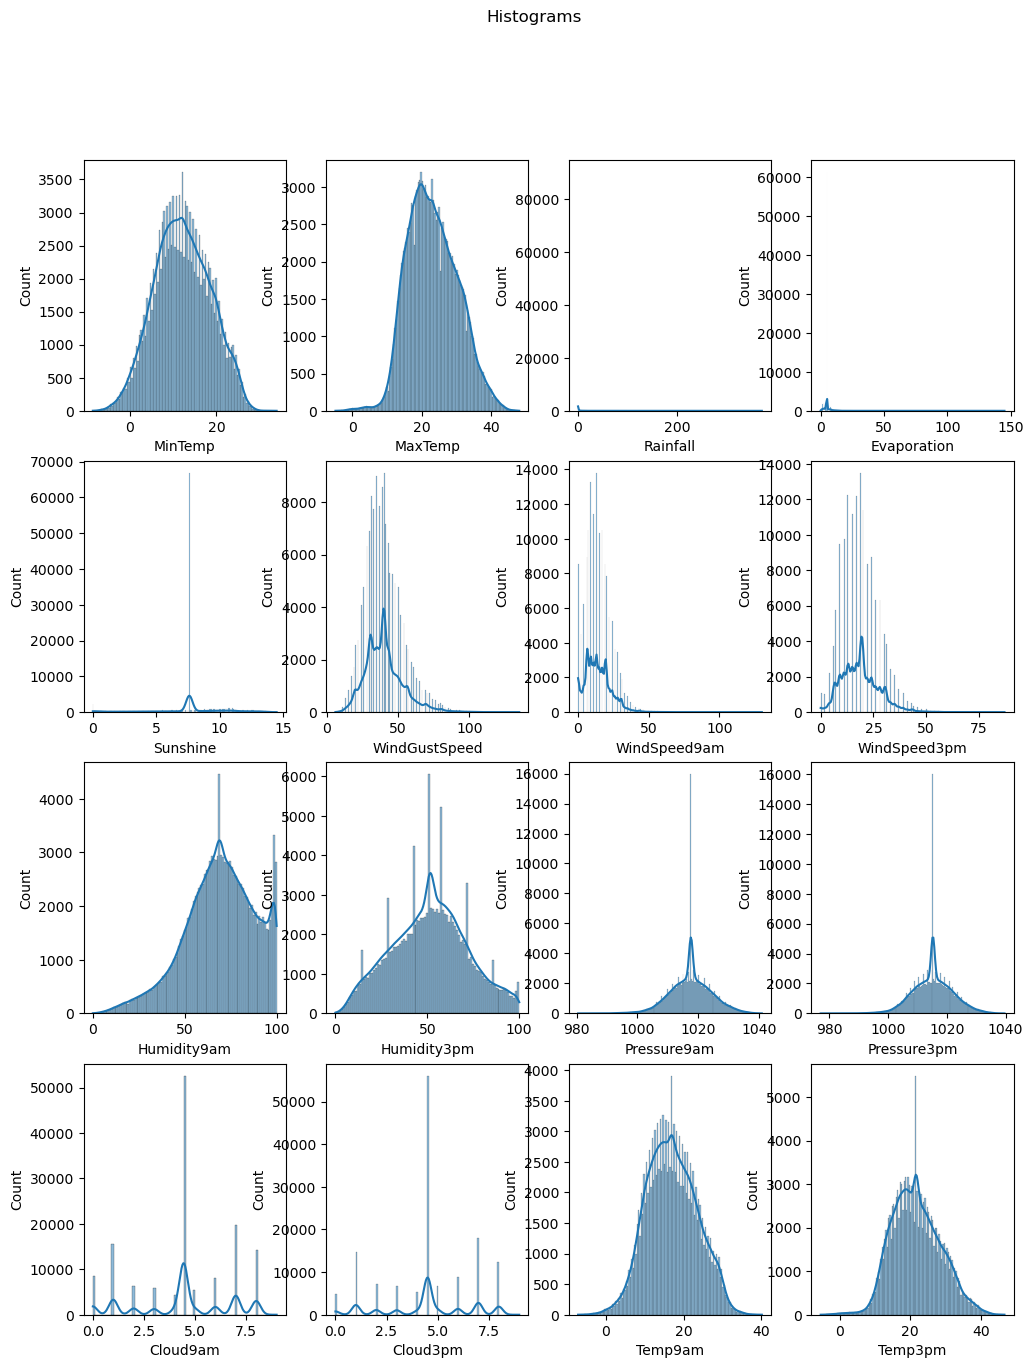

In [14]:
fig, axs = plt.subplots(4, 4, figsize=(12, 15))
fig.suptitle("Histograms")

sns.histplot(df["MinTemp"], ax=axs[0,0], kde=True)
sns.histplot(df["MaxTemp"], ax=axs[0,1], kde=True)
sns.histplot(df["Rainfall"], ax=axs[0,2], kde=True)
sns.histplot(df["Evaporation"], ax=axs[0,3], kde=True)
sns.histplot(df["Sunshine"], ax=axs[1,0], kde=True)
sns.histplot(df["WindGustSpeed"], ax=axs[1,1], kde=True)
sns.histplot(df["WindSpeed9am"], ax=axs[1,2], kde=True)
sns.histplot(df["WindSpeed3pm"], ax=axs[1,3], kde=True)
sns.histplot(df["Humidity9am"], ax=axs[2,0], kde=True)
sns.histplot(df["Humidity3pm"], ax=axs[2,1], kde=True)
sns.histplot(df["Pressure9am"], ax=axs[2,2], kde=True)
sns.histplot(df["Pressure3pm"], ax=axs[2,3], kde=True)
sns.histplot(df["Cloud9am"], ax=axs[3,0], kde=True)
sns.histplot(df["Cloud3pm"], ax=axs[3,1], kde=True)
sns.histplot(df["Temp9am"], ax=axs[3,2], kde=True)
sns.histplot(df["Temp3pm"], ax=axs[3,3], kde=True)

Analising the histograms for each numeric feature we can also see some diferrences. In this case, most of the features tend to have a normal distribuiton. 

Do to the fact that some features have large outliers that tend to affect the ability to show the data, we are know doing the histograms separetly.

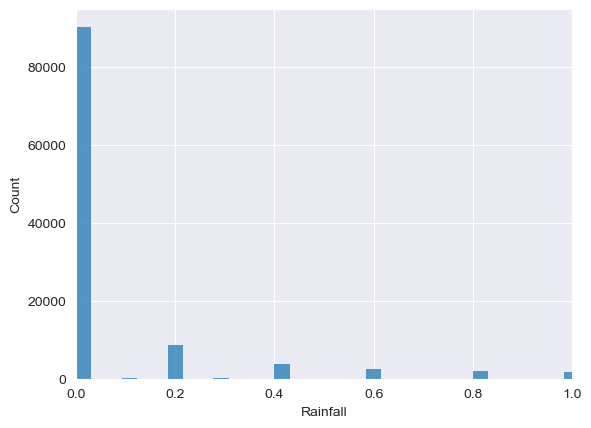

In [22]:
sns.histplot(df.Rainfall)
plt.xlim(0, 1);

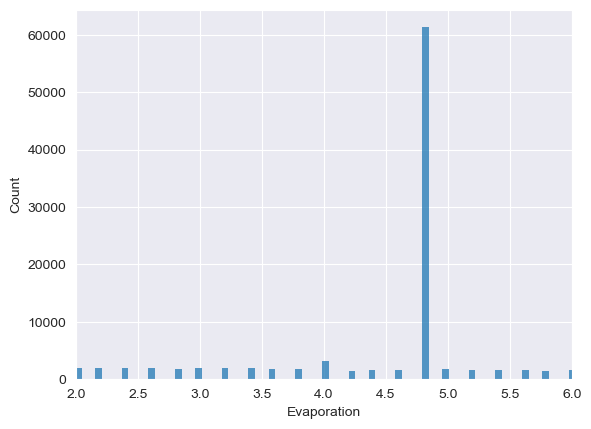

In [23]:
sns.histplot(df.Evaporation)
plt.xlim(2, 6);

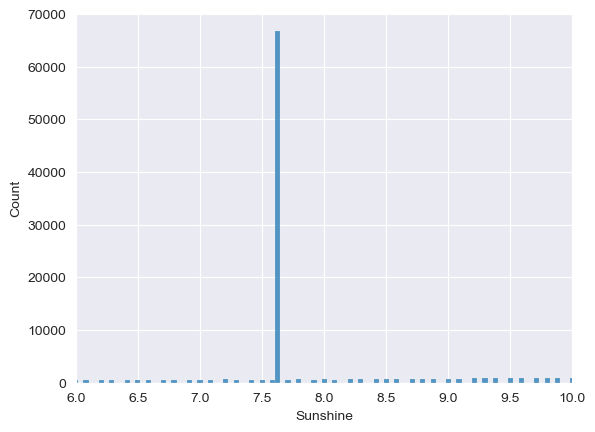

In [24]:
sns.histplot(df.Sunshine)
plt.xlim(6, 10);

<Axes: ylabel='Temp3pm'>

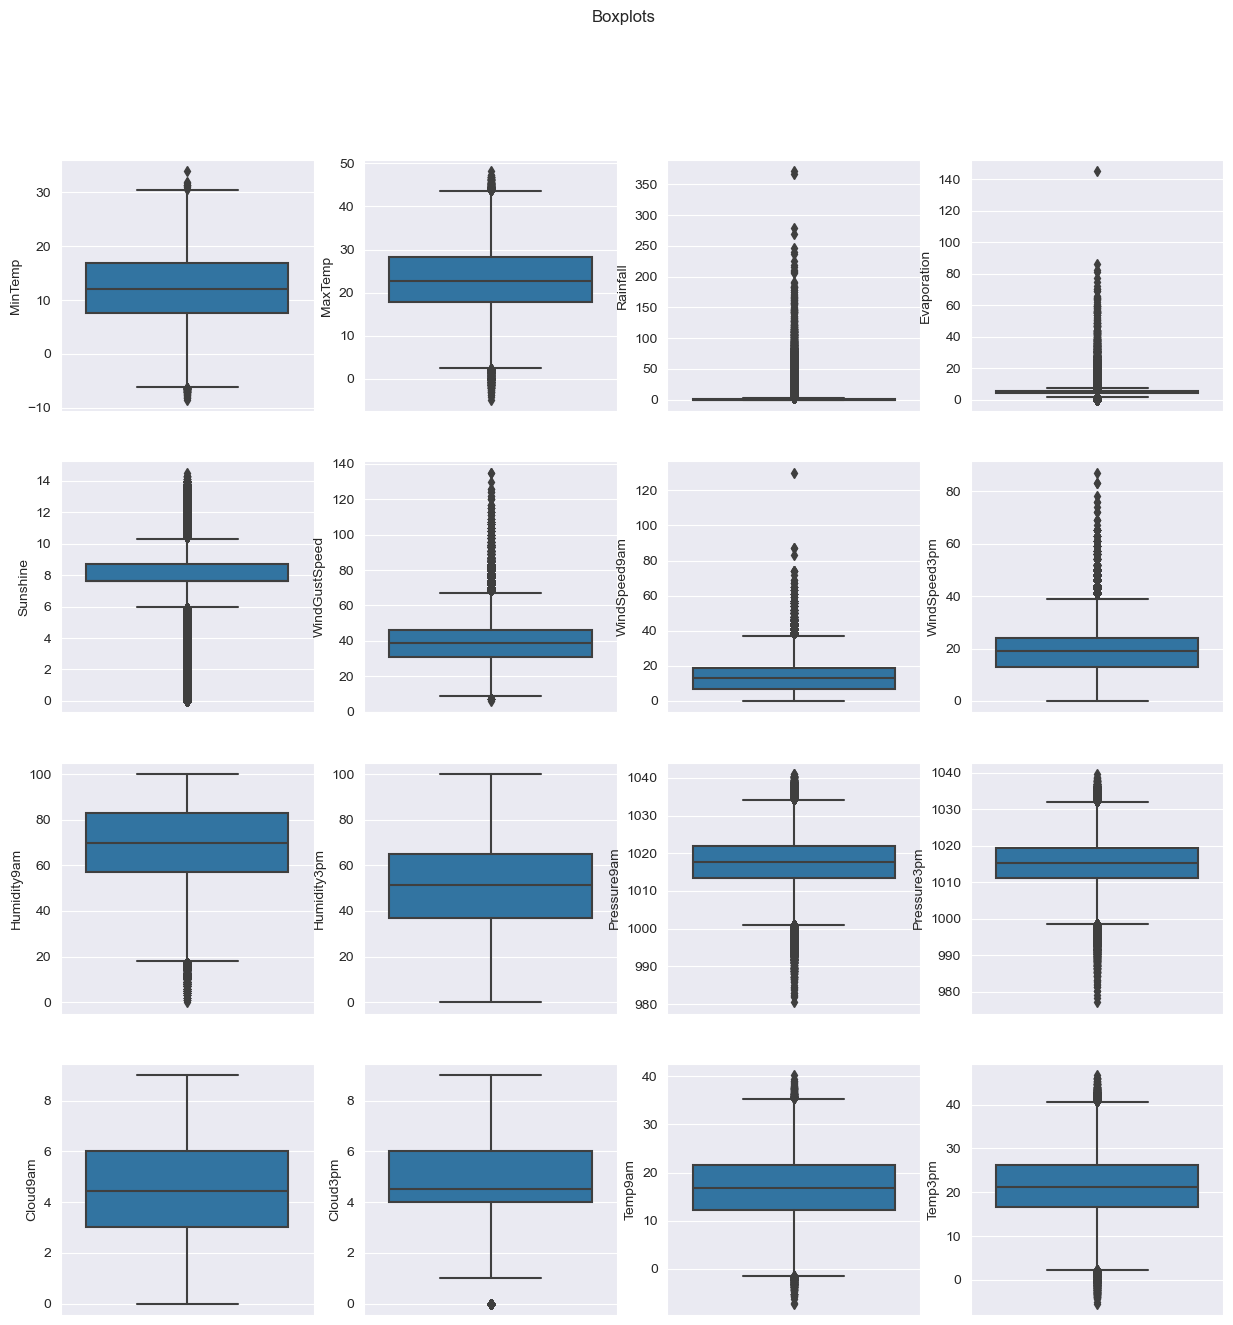

In [19]:
fig, axs = plt.subplots(4, 4, figsize=(15, 15))
fig.suptitle("Boxplots")

sns.boxplot(y=df["MinTemp"], ax=axs[0,0])
sns.boxplot(y=df["MaxTemp"], ax=axs[0,1])
sns.boxplot(y=df["Rainfall"], ax=axs[0,2])
sns.boxplot(y=df["Evaporation"], ax=axs[0,3])
sns.boxplot(y=df["Sunshine"], ax=axs[1,0])
sns.boxplot(y=df["WindGustSpeed"], ax=axs[1,1])
sns.boxplot(y=df["WindSpeed9am"], ax=axs[1,2])
sns.boxplot(y=df["WindSpeed3pm"], ax=axs[1,3])
sns.boxplot(y=df["Humidity9am"], ax=axs[2,0])
sns.boxplot(y=df["Humidity3pm"], ax=axs[2,1])
sns.boxplot(y=df["Pressure9am"], ax=axs[2,2])
sns.boxplot(y=df["Pressure3pm"], ax=axs[2,3])
sns.boxplot(y=df["Cloud9am"], ax=axs[3,0])
sns.boxplot(y=df["Cloud3pm"], ax=axs[3,1])
sns.boxplot(y=df["Temp9am"], ax=axs[3,2])
sns.boxplot(y=df["Temp3pm"], ax=axs[3,3])

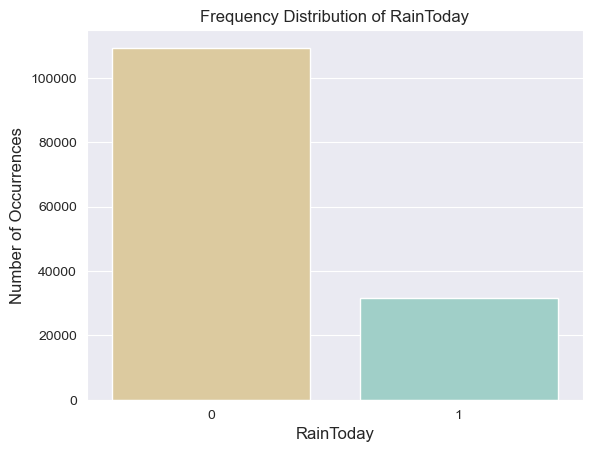

In [20]:
raintoday_count = df['RainToday'].value_counts()
sns.set_style('darkgrid')
sns.barplot(x=raintoday_count.index, y=raintoday_count.values, palette='BrBG')
plt.title('Frequency Distribution of RainToday')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('RainToday', fontsize=12)
plt.show()